**Loading**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Customer Churn Prediction/Churn_Modelling.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Visualization**

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
data_shape = df.shape
print(f'The dataset contains {data_shape[0]} rows and {data_shape[1]} columns.')

The dataset contains 10000 rows and 14 columns.


In [ ]:
null_check = df.isna().sum()
null_check

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


In [ ]:
data_description = df.describe()
print(data_description)

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

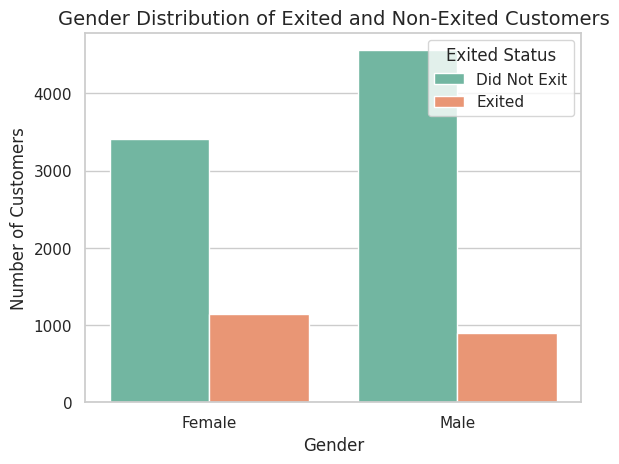

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2')

plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title("Gender Distribution of Exited and Non-Exited Customers", fontsize=14)

plt.legend(title='Exited Status', loc='upper right', labels=['Did Not Exit', 'Exited'])
plt.show()

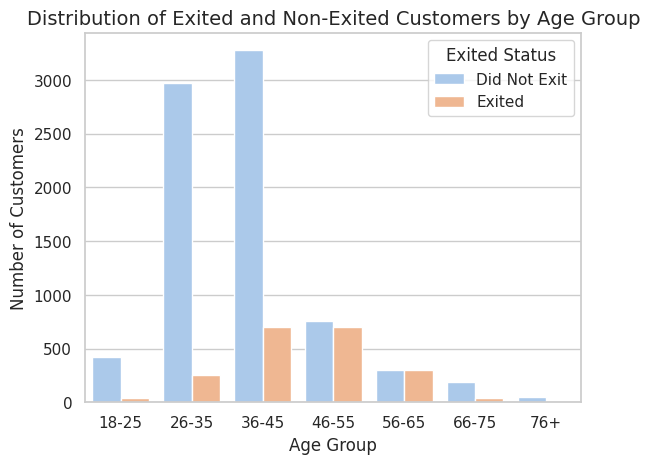

In [ ]:
sns.set(style="whitegrid")
bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
sns.countplot(x='Age Group', hue='Exited', data=df, palette='pastel')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title("Distribution of Exited and Non-Exited Customers by Age Group", fontsize=14)
plt.legend(title='Exited Status', loc='upper right', labels=['Did Not Exit', 'Exited'])
plt.show()

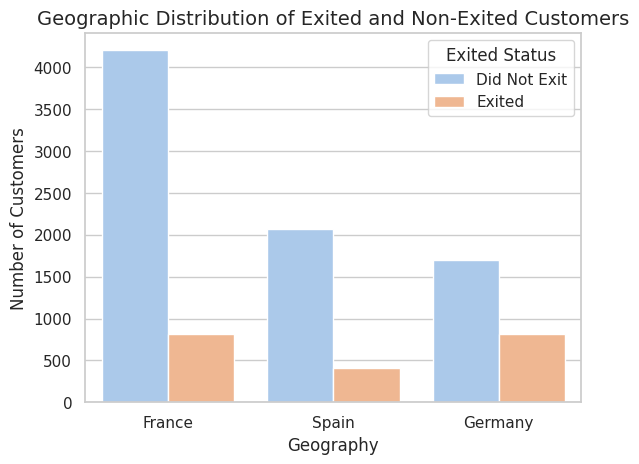

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x='Geography', hue='Exited', data=df, palette='pastel')
plt.xlabel("Geography", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title("Geographic Distribution of Exited and Non-Exited Customers", fontsize=14)
plt.legend(title='Exited Status', loc='upper right', labels=['Did Not Exit', 'Exited'])
plt.show()

<ipython-input-31-7605ac95e5a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='pastel', order=df['Exited'].value_counts().index)


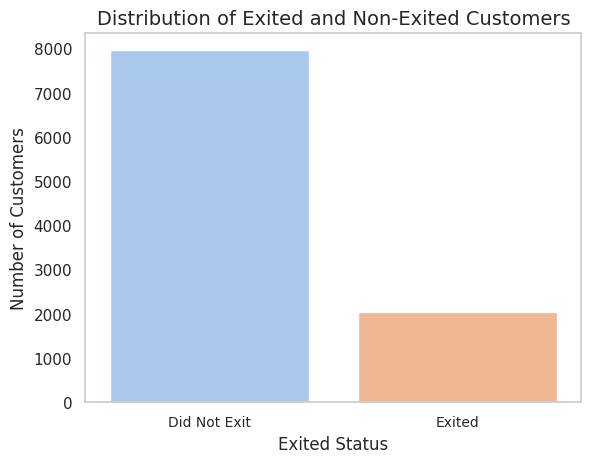

In [ ]:
sns.set(style="whitegrid")

sns.countplot(data=df, x='Exited', palette='pastel', order=df['Exited'].value_counts().index)

plt.xlabel("Exited Status", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title("Distribution of Exited and Non-Exited Customers", fontsize=14)

plt.xticks(ticks=[0, 1], labels=['Did Not Exit', 'Exited'], fontsize=10)
plt.grid(axis='y')
plt.show()

**Transforming Raw Data into Usable Formats**

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age Group'],
      dtype='object')

 **Drop Unnecessary Columns**

In [ ]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']

df_cleaned = df.drop(columns=columns_to_drop)

print("Remaining columns after dropping unnecessary ones:")
print(df_cleaned.columns.tolist())
df_cleaned.shape

Remaining columns after dropping unnecessary ones:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age Group']


(10000, 12)

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df_cleaned.columns:
    if pd.api.types.is_object_dtype(df_cleaned[column]) or pd.api.types.is_categorical_dtype(df_cleaned[column]):
        df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])
print(df_cleaned.head())

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Age Group  
0          1               1        101348.88       1          2  
1          0               1        112542.58       0          2  
2          1               0        113931.57       1          2  
3          0               0         93826.63       0          2  
4          1               1         79084.10       0          2  


<ipython-input-44-71277383a57c>:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_object_dtype(df_cleaned[column]) or pd.api.types.is_categorical_dtype(df_cleaned[column]):


**Segmenting Features into Inputs and Outputs**

In [ ]:
X = df_cleaned.drop(columns=['Exited'])
y = df_cleaned['Exited']

print("Input features (X) shape:", X.shape)
print("Output feature (y) shape:", y.shape)

Input features (X) shape: (10000, 11)
Output feature (y) shape: (10000,)


**Standardizing the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
print(x_scaled[0:5])

[[-0.32622142 -0.90188624 -1.09598752  0.29351742 -1.04175968 -1.22584767
  -0.91158349  0.64609167  0.97024255  0.02188649  0.05323044]
 [-0.44003595  1.51506738 -1.09598752  0.19816383 -1.38753759  0.11735002
  -0.91158349 -1.54776799  0.97024255  0.21653375  0.05323044]
 [-1.53679418 -0.90188624 -1.09598752  0.29351742  1.03290776  1.33305335
   2.52705662  0.64609167 -1.03067011  0.2406869   0.05323044]
 [ 0.50152063 -0.90188624 -1.09598752  0.00745665 -1.38753759 -1.22584767
   0.80773656 -1.54776799 -1.03067011 -0.10891792  0.05323044]
 [ 2.06388377  1.51506738 -1.09598752  0.38887101 -1.04175968  0.7857279
  -0.91158349  0.64609167  0.97024255 -0.36527578  0.05323044]]


**Dividing Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,
    y,
    test_size=0.2,
    random_state=42
)

# Display the shapes of the resulting datasets
print("Training feature set shape:", x_train.shape)
print("Testing feature set shape:", x_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (8000, 11)
Testing feature set shape: (2000, 11)
Training target set shape: (8000,)
Testing target set shape: (2000,)


**Train the Logistic Regression Model on the Preprocessed Data**

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

print("Logistic Regression model has been successfully trained on the training data.")

Logistic Regression model has been successfully trained on the training data.


**Identifying Potential Customer Churn**

In [ ]:
predict = logistic_regression_model.predict(x_test)

In [ ]:
print(logistic_regression_model.score(x_test,y_test)*100, '%')

81.55 %


In [ ]:
for i in range(50):
    churn_status = "Will Not Churn" if predict[i] == 0 else "Will Churn"
    print(f"Customer {i + 1} {churn_status}")

Customer 1 Will Not Churn
Customer 2 Will Not Churn
Customer 3 Will Not Churn
Customer 4 Will Not Churn
Customer 5 Will Not Churn
Customer 6 Will Not Churn
Customer 7 Will Not Churn
Customer 8 Will Not Churn
Customer 9 Will Not Churn
Customer 10 Will Not Churn
Customer 11 Will Not Churn
Customer 12 Will Churn
Customer 13 Will Not Churn
Customer 14 Will Not Churn
Customer 15 Will Not Churn
Customer 16 Will Not Churn
Customer 17 Will Not Churn
Customer 18 Will Not Churn
Customer 19 Will Not Churn
Customer 20 Will Not Churn
Customer 21 Will Not Churn
Customer 22 Will Not Churn
Customer 23 Will Not Churn
Customer 24 Will Not Churn
Customer 25 Will Not Churn
Customer 26 Will Not Churn
Customer 27 Will Not Churn
Customer 28 Will Not Churn
Customer 29 Will Not Churn
Customer 30 Will Not Churn
Customer 31 Will Not Churn
Customer 32 Will Not Churn
Customer 33 Will Not Churn
Customer 34 Will Not Churn
Customer 35 Will Not Churn
Customer 36 Will Churn
Customer 37 Will Not Churn
Customer 38 Will N

 **Classification Report**

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predict)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



**Confusion Matrix**

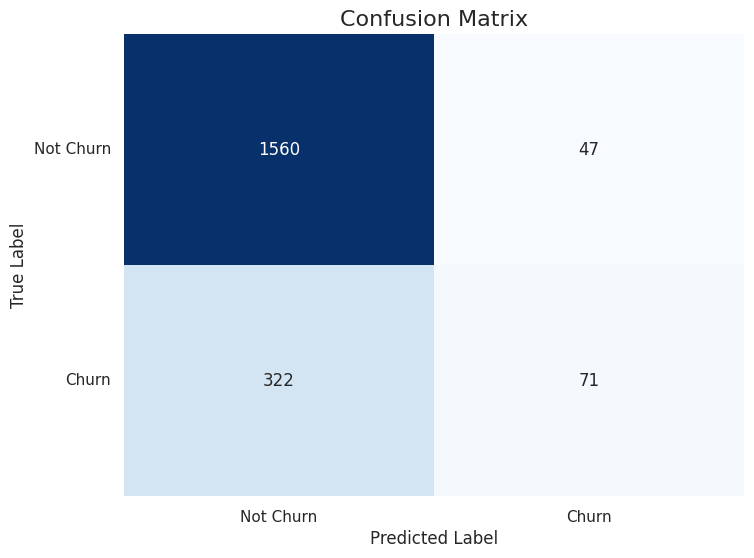

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


confusion_mtx = confusion_matrix(y_test, predict)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 12})

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'], rotation=0)
plt.yticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'], rotation=0)

plt.show()

In [ ]:
comparison_df = pd.DataFrame({
    'Random ID': range(1, len(y_test) + 1),  # Random number column
    'Actual': ['Will Churn' if value == 1 else 'Will Not Churn' for value in y_test],
    'Predicted': ['Will Churn' if value == 1 else 'Will Not Churn' for value in predict]
})


comparison_df[170:190]

,Random ID,Actual,Predicted
170,171,Will Not Churn,Will Not Churn
171,172,Will Not Churn,Will Not Churn
172,173,Will Churn,Will Churn
173,174,Will Not Churn,Will Not Churn
174,175,Will Not Churn,Will Not Churn
175,176,Will Not Churn,Will Not Churn
176,177,Will Not Churn,Will Not Churn
177,178,Will Not Churn,Will Not Churn
178,179,Will Not Churn,Will Not Churn
179,180,Will Not Churn,Will Not Churn
